# Polynomial Regression - Lab

## Introduction

In this lab you'll practice your knowledge on adding polynomial terms to your regression model! 

## Objectives

You will be able to:

- Understand how to account for non-linear relationships between predictors and target variable using polynomial terms

## Create the best plot using polynomials!

Here is a plot with a clearly non-linear shape. Begin to think about what degree polynomial you believe will fit it best.

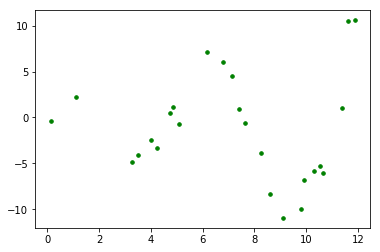

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

def pol(x):
    return x * np.cos(x)

x = np.linspace(0, 12, 100)
rng = np.random.RandomState(1234)
rng.shuffle(x)
x = np.sort(x[:25])
y = pol(x) + np.random.randn(25)*2

plt.scatter(x, y, color='green', s=50, marker='.')

plt.show();

Now it's time to determine the optimal degree of polynomial features for a model that is fit to this data     
- Plot a polynomial function using `PolynomialFeatures` for polynomials up until the second, third and fourth degree. Make sure to label each degree polynomial in your plot.   
- Print out the $R^2$ value for each of the three results. Draw conclusions with respect to which degree is best.

## Solution

In [16]:
## your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

import pandas as pd

In [17]:
#Need data to be in column form
#X = x[:, np.newaxis]
X = pd.DataFrame(x,columns=['X'])

The transformed feature names are: ['1', 'x0', 'x0^2']
The transformed feature names are: ['1', 'x0', 'x0^2', 'x0^3']
The transformed feature names are: ['1', 'x0', 'x0^2', 'x0^3', 'x0^4']


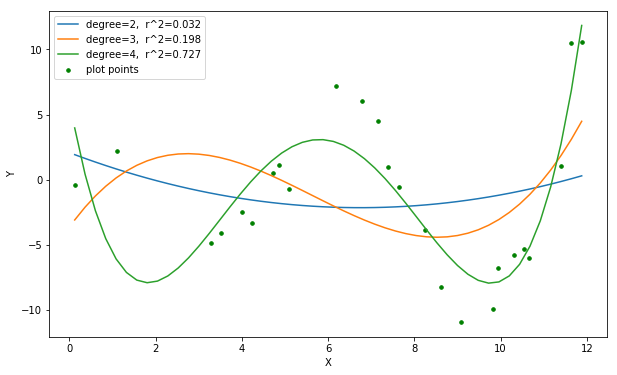

In [29]:
polynomial_degrees = [2,3,4]

#Plot datapoints
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='green', s=50, marker='.', label="plot points")

for degree in polynomial_degrees:
    
    #Set up polynomial features
    poly = PolynomialFeatures(degree)
    X_fin = poly.fit_transform(X)
    print('The transformed feature names are: {}'.format(poly.get_feature_names()))
    
    #Perform regression
    reg_poly = LinearRegression().fit(X_fin, y)
    
    #Get R^2 score
    r2 = round(r2_score(y,reg_poly.predict(X_fin)),3)
    
    #get x and y predicted values for fit line
    X_linspace = pd.DataFrame(np.linspace(x.min(),x.max(),50), columns = ["X"])
    X_linspace_fin = poly.fit_transform(X_linspace)
    y_poly_pred = reg_poly.predict(X_linspace_fin)
    
    #plot the resulting fit line
    plt.plot(X_linspace,y_poly_pred, label="degree={},  r^2={}".format(degree,r2))
    
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

## Summary

Great! You now know how to include polynomials in your linear model!